In [11]:
pip install pandas-datareader


     ------------------------------------ 109.5/109.5 kB 902.0 kB/s eta 0:00:00


In [12]:
pip install yfinance --upgrade --no-cache-dir


     ---------------------------------------- 60.3/60.3 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 3.3 MB/s eta 0:00:00


In [13]:
# Importa as bibliotecas
import pandas as pd
import math
import numpy as np
import pandas_datareader.data as pdr
from matplotlib import pyplot as plt

In [14]:
import yfinance as yf
yf.pdr_override()

In [15]:
# Ativos
symbols = ['CLSC4.SA']
# Importa os preços
preco = pdr.get_data_yahoo(symbols)['Adj Close']
# Obtém o número de observações do tempo
tempo = (preco.index[-1] - preco.index[0]).days
# Média dos retornos
media_retorno = preco.pct_change().mean()
# Desvio padrão dos retornos
desvio_retorno = preco.pct_change().std()
# A partir dos inputs, iremos gerar os valores aleatórios da simulação
print ("Retorno esperado : ", str(round(media_retorno, 4)))
print ("Desvio padrão : ", str(round(desvio_retorno, 4)))

[*********************100%***********************]  1 of 1 completed
Retorno esperado :  0.0006
Desvio padrão :  0.0232


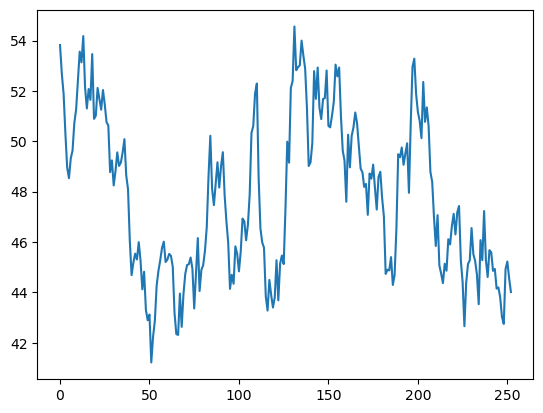

In [16]:
# Gera valores aleatórios para 1 ano em dias úteis (252 dias) assumindo distribuição normal
retorno_diario_sim = np.random.normal(media_retorno, desvio_retorno, 252) + 1
# A partir do valores aleatórios futuros dos retornos, aplicamos no último valor do preço da ação
price_series = [preco[-1]]
for j in retorno_diario_sim:
    price_series.append(price_series[-1] * j) 
plt.plot(price_series)

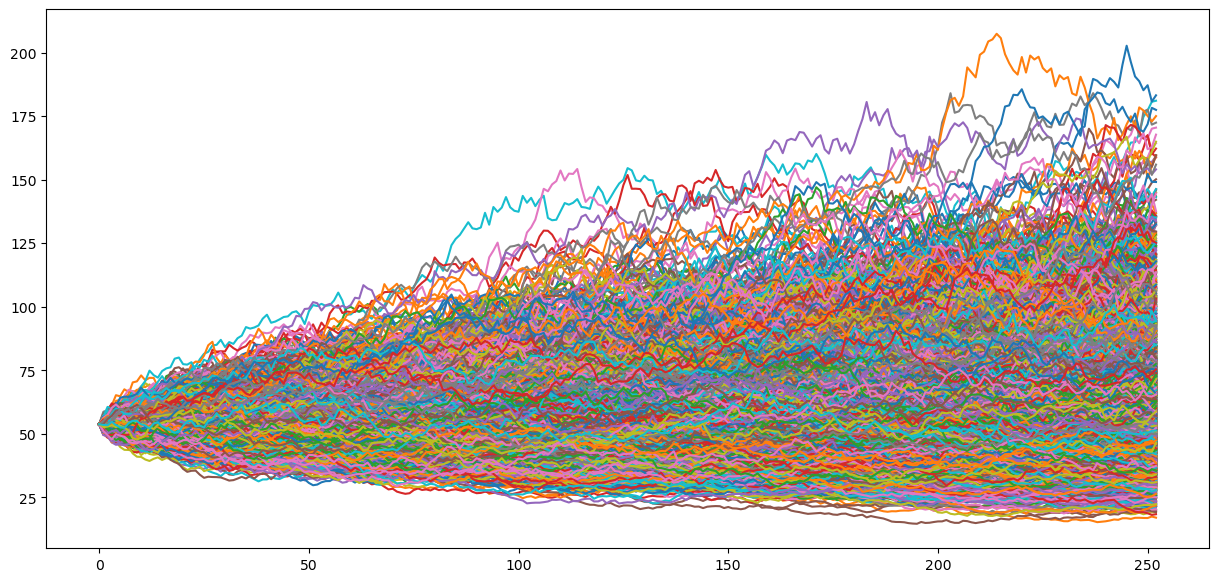

(array([ 10.,  31.,  65., 105., 151., 194., 213., 254., 226., 233., 202.,
        206., 193., 167., 145., 102.,  72.,  79.,  77.,  46.,  46.,  38.,
         30.,  19.,  23.,  14.,  12.,   9.,  10.,   1.,   5.,   4.,   2.,
          1.,   6.,   2.,   2.,   1.,   2.,   2.]),
 array([ 17.06442634,  21.21709094,  25.36975553,  29.52242013,
         33.67508472,  37.82774932,  41.98041392,  46.13307851,
         50.28574311,  54.43840771,  58.5910723 ,  62.7437369 ,
         66.89640149,  71.04906609,  75.20173069,  79.35439528,
         83.50705988,  87.65972447,  91.81238907,  95.96505367,
        100.11771826, 104.27038286, 108.42304745, 112.57571205,
        116.72837665, 120.88104124, 125.03370584, 129.18637043,
        133.33903503, 137.49169963, 141.64436422, 145.79702882,
        149.94969341, 154.10235801, 158.25502261, 162.4076872 ,
        166.5603518 , 170.71301639, 174.86568099, 179.01834559,
        183.17101018]),
 <BarContainer object of 40 artists>)

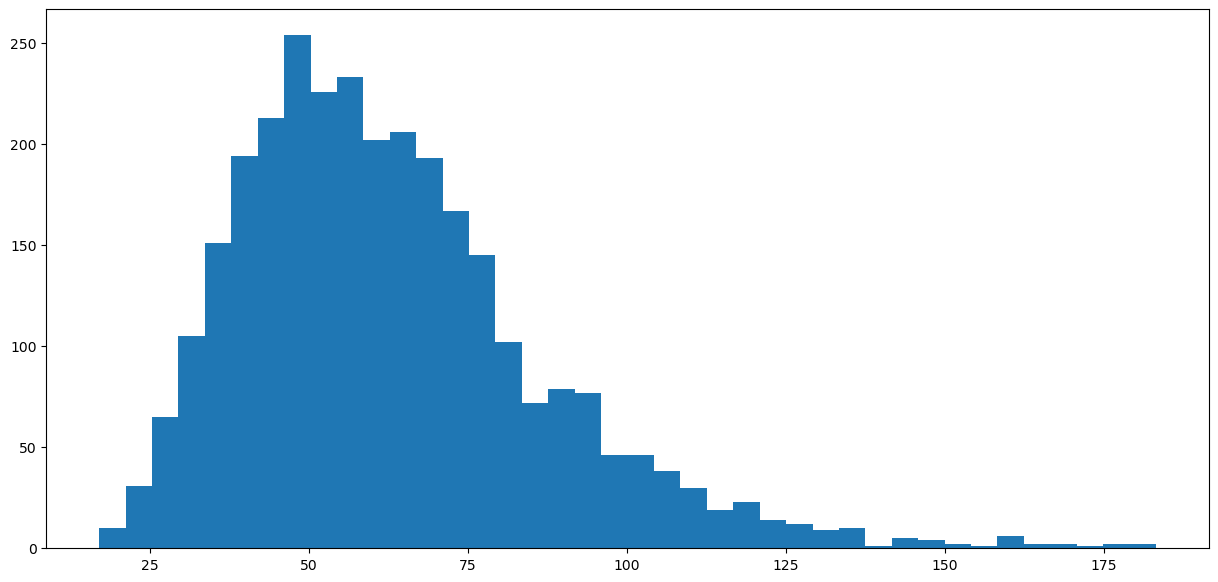

In [17]:
plt.figure(figsize = (15, 7))
# Cria várias simulações
numero_processos = 3000
precos_fechamento = []
for i in range(numero_processos):
    retorno_diario = np.random.normal(media_retorno, desvio_retorno, 252) + 1
    serie_precos = [preco[-1]]
    for j in retorno_diario:
        serie_precos.append(serie_precos[-1] * j)
 
    # anexa o último valor do preço
    precos_fechamento.append(serie_precos[-1])
    # plota
    plt.plot(serie_precos)
plt.show()
plt.figure(figsize = (15, 7))
# plota histograma
plt.hist(precos_fechamento,bins=40)

In [18]:
# Analisa o resultado médio de todos os preços simulados
media_final = round(np.mean(precos_fechamento),2)
print("Preço Esperado: ", str(media_final))

Preço Esperado:  62.86
